In [107]:
#headers here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import numpy
%matplotlib inline

We use pyspark to aggregate yearly, weekly, monthly data for both crime and collisions. Using those data, we will now find the correlation across two data sets. 

In [108]:
crime = pd.read_table('yearly_monthly_weekly_crime.txt',header=-1)
crime.columns = ["year","month","week_number",'weekday',"crime"]
collisions = pd.read_table('yearly_monthly_weekly_collisions.txt', header = -1)
collisions.columns = ["year","month","week_number",'weekday',"collisions"]
crime_collisions = pd.merge(crime, collisions, on=["year","month","week_number","weekday"], how='left')
print(crime_collisions.head())

   year  month  week_number  weekday  crime  collisions
0  2015      7           30        7   1364       551.0
1  2012      2            9        2   1466         NaN
2  2006     12           50        1   1582         NaN
3  2012      7           29        2   1504       648.0
4  2006      4           16        5   1488         NaN


We will check each column to make sure which one has null values. 

In [109]:
crime_collisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 0 to 4017
Data columns (total 6 columns):
year           4018 non-null int64
month          4018 non-null int64
week_number    4018 non-null int64
weekday        4018 non-null int64
crime          4018 non-null int64
collisions     1645 non-null float64
dtypes: float64(1), int64(5)
memory usage: 219.7 KB


There are null values on collisions . We have to remove them before finding correlation. 


In [110]:
crime_collisions = crime_collisions[crime_collisions['collisions'].notnull()]
crime_collisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 0 to 4017
Data columns (total 6 columns):
year           1645 non-null int64
month          1645 non-null int64
week_number    1645 non-null int64
weekday        1645 non-null int64
crime          1645 non-null int64
collisions     1645 non-null float64
dtypes: float64(1), int64(5)
memory usage: 90.0 KB


In [111]:
#now that we can find correlation
numpy.corrcoef(crime_collisions['crime'], crime_collisions['collisions'])[0, 1]

0.40994537550558974

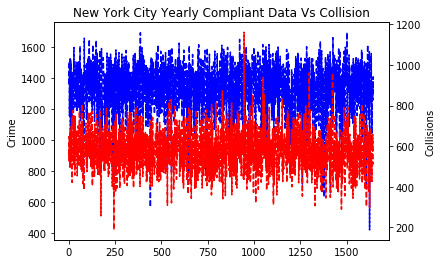

In [112]:
y1= list(crime_collisions["crime"])
y2 = list(crime_collisions["collisions"])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(y1,'b-',linestyle='--')
ax1.set_ylabel('Crime')
ax2 = ax1.twinx()
ax2.plot(y2,'r-',linestyle='--')
ax2.set_ylabel('Collisions')

plt.title("New York City Yearly Compliant Data Vs Collision")


Can we do better ? What if we aggregate by yearly and weekly . 


In [113]:
grouped_year_month= crime_collisions.groupby(["year","month"],sort=True).sum()
numpy.corrcoef(grouped_year_month['crime'], grouped_year_month['collisions'])[0, 1]

0.39362507729987628

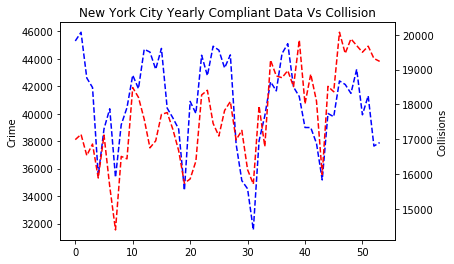

In [114]:
y1= list(grouped_year_month["crime"])
y2 = list(grouped_year_month["collisions"])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(y1,'b-',linestyle='--')
ax1.set_ylabel('Crime')
ax2 = ax1.twinx()
ax2.plot(y2,'r-',linestyle='--')
ax2.set_ylabel('Collisions')

plt.title("New York City Yearly Compliant Data Vs Collision")

How about yearly and by week number ?

In [117]:
grouped_year_week_num= crime_collisions.groupby(["year","week_number"],sort=True).sum()
numpy.corrcoef(grouped_year_week_num['crime'], grouped_year_week_num['collisions'])[0, 1]

0.7056237730984305

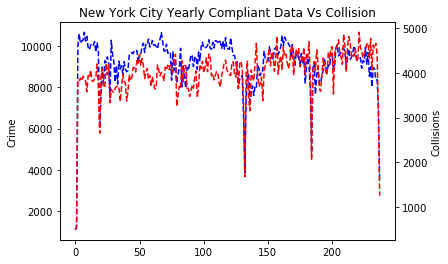

In [118]:
y1= list(grouped_year_week_num["crime"])
y2 = list(grouped_year_week_num["collisions"])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(y1,'b-',linestyle='--')
ax1.set_ylabel('Crime')
ax2 = ax1.twinx()
ax2.plot(y2,'r-',linestyle='--')
ax2.set_ylabel('Collisions')

plt.title("New York City Yearly Compliant Data Vs Collision")